# LIBRARIES

In [1]:
# IMPORT ALL NECESSARY LIBRARIES
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

# GLOBAL PLOTTING STYLE
from matplotlib import rcParams

# DATA LOADING

In [2]:
#  PATH TO THE DATASET
file_path = '../DATASET/DATA.csv'

df = pd.read_csv(file_path) 

# DISPLAY THE DIMENSIONS OF THE DATAFRAME (ROWS, COLUMNS)
print(f"DATAFRAME SHAPE: {df.shape}")

DATAFRAME SHAPE: (7043, 21)


# DATA INSPECTION

In [3]:
# DISPLAY THE FIRST 5 ROWS TO GET A QUICK OVERVIEW OF THE DATA
print("---------- DATAFRAME HEAD ----------")
print(df.head()) 

# DISPLAY THE LAST 5 ROWS TO CHECK THE END OF THE DATASET
print("\n---------- DATAFRAME TAIL ----------")
print(df.tail()) 

# GET A CONCISE SUMMARY OF THE DATAFRAME, INCLUDING DATA TYPES AND NON-NULL VALUES
print("\n---------- DATAFRAME INFO ----------")
df.info()

# PRINT COLUMN NAMES
print("\n---------- DATAFRAME COLUMNS ----------")
print(df.columns) 

---------- DATAFRAME HEAD ----------
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV

# DATA QUALITY AND CLEANING

In [4]:
# CHECK FOR DUPLICATE ROWS IN THE ENTIRE DATASET
duplicate_rows = df.duplicated().sum()
print(f"NUMBER OF DUPLICATE ROWS: {duplicate_rows}")

# CONVERT 'TOTALCHARGES' TO A NUMERIC TYPE. 'ERRORS='COERCE'' WILL REPLACE NON-NUMERIC VALUES WITH NAN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# CHECK FOR THE COUNT OF MISSING (NULL) VALUES IN EACH COLUMN
print("\n---------- MISSING VALUES COUNT ----------")
print(df.isnull().sum()) 

# HANDLE THE MISSING VALUES IN 'TOTALCHARGES' BY FILLING WITH THE COLUMN'S MEDIAN
if df['TotalCharges'].isnull().sum() > 0: 
    median_total_charges = df['TotalCharges'].median() 
    df['TotalCharges'].fillna(median_total_charges, inplace=True) 
    print(f"\nFILLED {df['TotalCharges'].isnull().sum()} MISSING 'TotalCharges' VALUES WITH THE MEDIAN ({median_total_charges}).")

# CONVERT 'CHURN' COLUMN TO A MORE USABLE NUMERIC FORMAT (0 OR 1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("CONVERTED 'CHURN' COLUMN TO NUMERIC (1 FOR YES, 0 FOR NO).")

NUMBER OF DUPLICATE ROWS: 0

---------- MISSING VALUES COUNT ----------
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

FILLED 0 MISSING 'TotalCharges' VALUES WITH THE MEDIAN (1397.475).
CONVERTED 'CHURN' COLUMN TO NUMERIC (1 FOR YES, 0 FOR NO).


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20408\1881570200.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


# DESCRIPTIVE STATISTICS

In [5]:
# GENERATE DESCRIPTIVE STATISTICS FOR ALL NUMERICAL COLUMNS
print("---------- DESCRIPTIVE STATISTICS (NUMERICAL COLUMNS) ----------")
display(df.describe())

# GENERATE DESCRIPTIVE STATISTICS FOR ALL CATEGORICAL (OBJECT) COLUMNS
print("\n---------- DESCRIPTIVE STATISTICS (CATEGORICAL COLUMNS) ----------")
display(df.describe(include='object'))

# CALCULATE THE OVERALL CHURN RATE
print("\n---------- OVERALL CHURN RATE ANALYSIS ----------")
# .VALUE_COUNTS(NORMALIZE=TRUE) GIVES THE PROPORTION OF EACH CATEGORY
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"CHURNED: {churn_rate[1]:.2f}%") 
print(f"NOT CHURNED: {churn_rate[0]:.2f}%") 

---------- DESCRIPTIVE STATISTICS (NUMERICAL COLUMNS) ----------


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000



---------- DESCRIPTIVE STATISTICS (CATEGORICAL COLUMNS) ----------


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365



---------- OVERALL CHURN RATE ANALYSIS ----------
CHURNED: 26.54%
NOT CHURNED: 73.46%


# CATEGORICAL FEATURE ANALYSIS

In [6]:
# SELECT CATEGORICAL COLUMNS (OBJECT TYPE)
categorical_cols = df.select_dtypes(include="object").columns  
print("CATEGORICAL COLUMNS:", list(categorical_cols)) 

# DISPLAY UNIQUE VALUES COUNT FOR EACH CATEGORICAL COLUMN
for col in categorical_cols:  
    print(f"\nCOLUMN: {col}")  
    print(df[col].value_counts().head(10)) 

CATEGORICAL COLUMNS: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

COLUMN: customerID
customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
Name: count, dtype: int64

COLUMN: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

COLUMN: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

COLUMN: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

COLUMN: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

COLUMN: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

COLUMN: InternetService
InternetService
Fiber opt

In [7]:
# ANALYZE THE DISTRIBUTION OF VALUES IN KEY CATEGORICAL COLUMNS

print("---------- CONTRACT TYPE DISTRIBUTION ----------")
print(df['Contract'].value_counts())

print("\n---------- INTERNET SERVICE DISTRIBUTION ----------")
print(df['InternetService'].value_counts())

print("\n---------- PAYMENT METHOD DISTRIBUTION ----------")
print(df['PaymentMethod'].value_counts())

# GROUP DATA BY 'CONTRACT' TYPE AND CALCULATE THE AVERAGE CHURN RATE FOR EACH
print("\n---------- CHURN RATE BY CONTRACT TYPE ----------")
churn_by_contract = df.groupby('Contract')['Churn'].mean() * 100
print(churn_by_contract.sort_values(ascending=False)) 

---------- CONTRACT TYPE DISTRIBUTION ----------
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

---------- INTERNET SERVICE DISTRIBUTION ----------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

---------- PAYMENT METHOD DISTRIBUTION ----------
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

---------- CHURN RATE BY CONTRACT TYPE ----------
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


# NUMERICAL VARIABLE ANALYSIS

In [8]:
# SELECT NUMERICAL COLUMNS
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns  
print("NUMERICAL COLUMNS:", list(numerical_cols))  

# DISPLAY SUMMARY STATISTICS COLUMN-WISE
for col in numerical_cols:  
    print(f"\nCOLUMN: {col}")  
    print("MEAN:", df[col].mean())  
    print("STD DEV:", df[col].std())  
    print("MIN:", df[col].min())  
    print("MAX:", df[col].max())  

NUMERICAL COLUMNS: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

COLUMN: SeniorCitizen
MEAN: 0.1621468124378816
STD DEV: 0.3686116056100131
MIN: 0
MAX: 1

COLUMN: tenure
MEAN: 32.37114865824223
STD DEV: 24.55948102309446
MIN: 0
MAX: 72

COLUMN: MonthlyCharges
MEAN: 64.76169246059918
STD DEV: 30.090047097678493
MIN: 18.25
MAX: 118.75

COLUMN: TotalCharges
MEAN: 2281.9169281556156
STD DEV: 2265.270398482188
MIN: 18.8
MAX: 8684.8

COLUMN: Churn
MEAN: 0.2653698707936959
STD DEV: 0.441561305121947
MIN: 0
MAX: 1


# CORRELATION ANALYSIS

In [9]:
# COMPUTE CORRELATION MATRIX FOR NUMERICAL COLUMNS
correlation_matrix = df.corr(numeric_only=True)  
print("CORRELATION MATRIX:\n", correlation_matrix) 

CORRELATION MATRIX:
                 SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.016567        0.220173      0.102652   
tenure               0.016567  1.000000        0.247900      0.825464   
MonthlyCharges       0.220173  0.247900        1.000000      0.650864   
TotalCharges         0.102652  0.825464        0.650864      1.000000   
Churn                0.150889 -0.352229        0.193356     -0.199037   

                   Churn  
SeniorCitizen   0.150889  
tenure         -0.352229  
MonthlyCharges  0.193356  
TotalCharges   -0.199037  
Churn           1.000000  


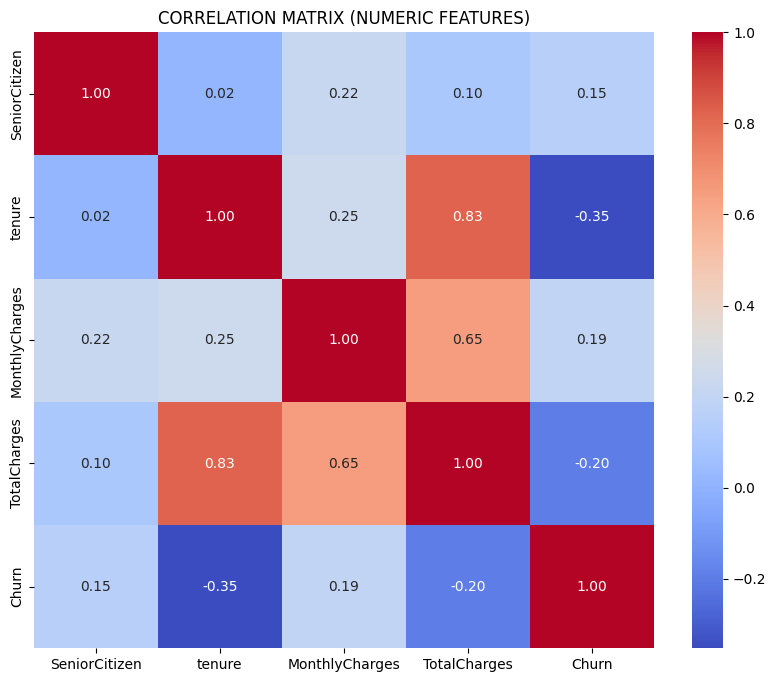

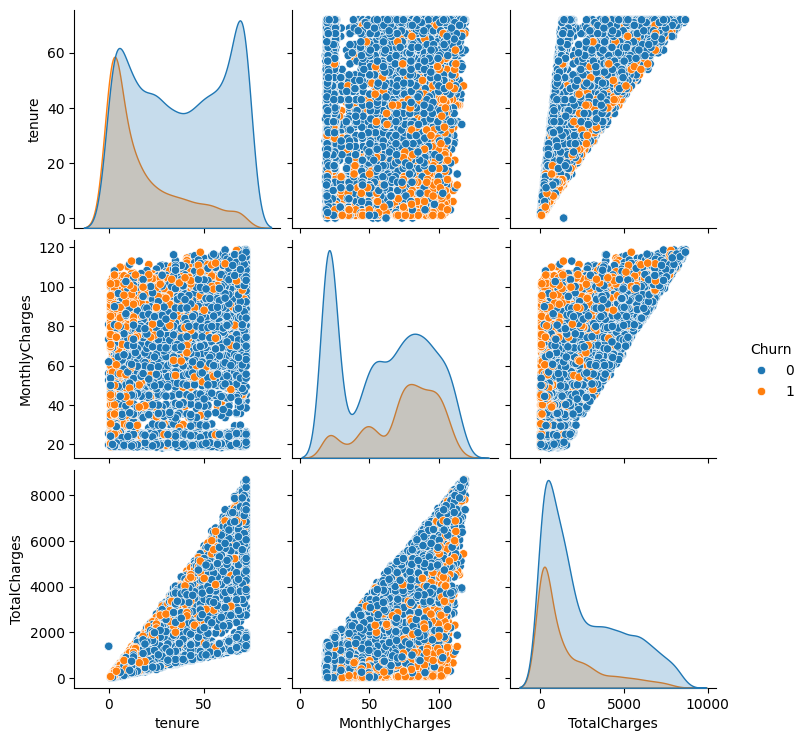

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# CORRELATION HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("CORRELATION MATRIX (NUMERIC FEATURES)")
plt.show()

# PAIR PLOT ON SELECT NUMERIC FEATURES
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

# DATA PREPARATION FOR MODEL TRAINING

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. DROP NON-INFORMATIVE COLUMNS
df_clean = df.drop(columns=["customerID"])  

# 2. SEPARATE FEATURES AND TARGET
X = df_clean.drop("Churn", axis=1)  
y = df_clean["Churn"]  

# 3. IDENTIFY CATEGORICAL AND NUMERICAL COLUMNS
categorical_cols = X.select_dtypes(include="object").columns.tolist() 
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()  

print("CATEGORICAL COLUMNS:", categorical_cols)
print("NUMERICAL COLUMNS:", numerical_cols)

# 4. ONE-HOT ENCODE CATEGORICAL COLUMNS
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  

# 5. SCALE NUMERICAL COLUMNS (OPTIONAL)
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# 6. FINAL DATASET READY FOR MODELING
print("FINAL DATASET SHAPE:", X_encoded.shape)

# 7. SAVE CLEAN DATASET FOR TEAMMATES
final_dataset = X_encoded.copy()
final_dataset["Churn"] = y  
# SAVE FINAL ML-READY DATASET
final_dataset.to_csv('../DATASET/DATA[T].csv', index=False)

CATEGORICAL COLUMNS: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
NUMERICAL COLUMNS: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [12]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

# DATA VISUALIZATION

In [46]:
# IMPORT THE NECESSARY MODULES
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# CREATE SUBPLOTS
fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]]
)

# --- CHART 1: GENDER DISTRIBUTION ---
# GET LABELS AND VALUES DIRECTLY FROM THE DATAFRAME TO ENSURE THEY MATCH
gender_counts = df['gender'].value_counts()
gender_labels = gender_counts.index

# ADD THE PIE CHART WITH CUSTOM COLORS
fig.add_trace(
    go.Pie(
        labels=gender_labels,
        values=gender_counts.values,
        name="Gender",
        marker_colors=['#636EFA', '#EF553B']
    ),
    1, 1
)

# --- CHART 2: CHURN DISTRIBUTION ---
# MAP THE 0/1 CHURN VALUES TO 'NO'/'YES' FOR CLEAR LABELS
churn_counts = df['Churn'].value_counts()
churn_labels = churn_counts.index.map({0: 'No', 1: 'Yes'})

# ADD THE PIE CHART WITH INTUITIVE COLORS (BLUE FOR 'NO', RED FOR 'YES')
fig.add_trace(
    go.Pie(
        labels=churn_labels,
        values=churn_counts.values,
        name="Churn",
        marker_colors=['#00CC96', '#AB63FA']
    ),
    1, 2
)

# --- STYLING AND LAYOUT ---
# USE 'HOLE' TO CREATE A DONUT CHART AND DISPLAY INFO DIRECTLY ON THE SLICES
fig.update_traces(hole=.4, textinfo='percent+label', textfont_size=16)

# UPDATE THE LAYOUT FOR A CLEANER LOOK
fig.update_layout(
    title_text="Customer Gender and Churn Distributions",
    title_x=0.5,  # CENTER THE TITLE
    showlegend=False,  # HIDE THE REDUNDANT LEGEND
    annotations=[
        dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
        dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)
    ]
)

# SHOW THE FIGURE
fig.show()

* **CUSTOMER GENDER DISTRIBUTION (LEFT):** The dataset shows a NEARLY BALANCED gender distribution, with **50.5% MALE** and **49.5% FEMALE** customers.
* **OVERALL CHURN RATE (RIGHT):** A significant MAJORITY of customers (**73.5%**) HAVE NOT CHURNED. However, a notable portion of the customer base, **26.5%**, HAS CHURNED, indicating that roughly ONE IN FOUR customers has left the service.

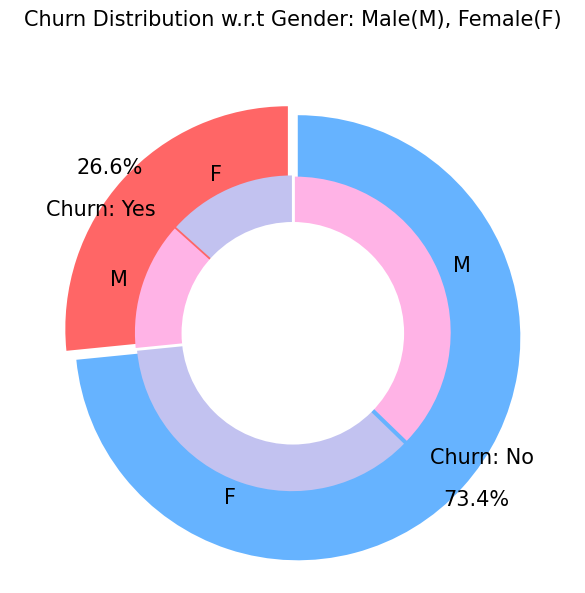

In [16]:
# IMPORTING THE REQUIRED LIBRARIES
import matplotlib.pyplot as plt

# DEFINE THE DATA FOR CHURN AND GENDER DISTRIBUTION
plt.figure(figsize=(6, 6))

# LABELS AND VALUES FOR CHURN DISTRIBUTION
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]

# LABELS AND SIZES FOR GENDER DISTRIBUTION (MALE AND FEMALE)
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]

# COLORS FOR THE PIE CHARTS
colors = ['#ff6666', '#66b3ff']  # COLORS FOR CHURN PIE
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']  # COLORS FOR GENDER PIE

# EXPLOSION SETTINGS FOR PIE CHART SEGMENTS
explode = (0.3, 0.3)  # EXPLODE THE CHURN PIE CHART SEGMENTS
explode_gender = (0.1, 0.1, 0.1, 0.1)  # EXPLODE THE GENDER PIE CHART SEGMENTS

# TEXT PROPERTIES FOR PIE CHART LABELS
textprops = {"fontsize": 15}

# PLOT THE CHURN PIE CHART
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8, 
        colors=colors, startangle=90, frame=True, explode=explode, radius=10, 
        textprops=textprops, counterclock=True)

# PLOT THE GENDER PIE CHART (WITHIN THE CHURN PIE CHART)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, 
        explode=explode_gender, radius=7, textprops=textprops, counterclock=True)

# DRAW A WHITE CIRCLE IN THE CENTER TO CREATE A DONUT CHART EFFECT
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()  # GET THE CURRENT FIGURE
fig.gca().add_artist(centre_circle)  # ADD THE CIRCLE TO THE FIGURE

# ADD A TITLE TO THE PLOT
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# ENSURE THE PIE CHART IS CIRCULAR AND PREVENT DISTORTION
plt.axis('equal')

# AUTOMATIC LAYOUT ADJUSTMENTS
plt.tight_layout()

# DISPLAY THE FINAL PLOT
plt.show()

* **OVERALL CHURN RATE (OUTER RING):** This chart shows that a MAJORITY of customers (**73.5%**) did NOT churn, while a significant minority (**26.5%**) did churn.

* **GENDER BREAKDOWN (INNER RING):** The inner ring analyzes the gender composition within each churn category. Crucially, the gender split remains almost perfectly balanced across both groups:
    * Among customers who **CHURNED**, the distribution is nearly 50/50 between males and females.
    * Among customers who **DID NOT CHURN**, the distribution is also nearly 50/50.

* **KEY INSIGHT:** The visualization strongly suggests that **GENDER IS NOT a significant factor in predicting customer churn**, as both male and female customers churn at almost identical rates.

In [22]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **NON-CHURNED CUSTOMERS (LEFT GROUP):** Among customers who DID NOT churn, there is a healthy mix of all contract types. A large number of these loyal customers are on **ONE-YEAR** and **TWO-YEAR** contracts, indicating that longer commitments are a sign of stability.

* **CHURNED CUSTOMERS (RIGHT GROUP):** The difference is dramatic for customers who DID churn. The VAST MAJORITY of churners are customers on a **MONTH-TO-MONTH** contract. In contrast, the number of churners from ONE-YEAR and TWO-YEAR contracts is extremely low.

* **KEY INSIGHT:** This chart clearly shows that the **CONTRACT TYPE is a POWERFUL PREDICTOR of churn**. The risk of a customer leaving is overwhelmingly concentrated in the MONTH-TO-MONTH segment.

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

* **MOST POPULAR METHOD:** **ELECTRONIC CHECK** is the most widely used payment method, accounting for over a THIRD (**33.6%**) of all customers.

* **DISTRIBUTION OF OTHER METHODS:** The remaining three payment methods are almost EVENLY SPLIT. **MAILED CHECK** (22.9%), **BANK TRANSFER** (21.9%), and **CREDIT CARD** (21.6%) each represent a similar portion of the customer base.

* **KEY INSIGHT:** A MAJORITY of customers (**over 56%**) rely on MANUAL payment methods (Electronic and Mailed checks) that require action each billing cycle, rather than AUTOMATIC, recurring payments. This reliance on manual payments could be a significant risk factor for involuntary churn due to missed or late payments.

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **NON-CHURNED CUSTOMERS (LEFT BAR):** Among customers who DID NOT churn, there is a relatively BALANCED distribution across all four payment methods. No single method overwhelmingly dominates this group of loyal customers.

* **CHURNED CUSTOMERS (RIGHT BAR):** The story is completely different for customers who DID churn. The **ELECTRONIC CHECK** segment MASSIVELY DOMINATES this bar, representing the largest group of churned customers by a wide margin.

* **KEY INSIGHT:** This visualization clearly indicates that the **PAYMENT METHOD is strongly correlated with customer churn**. Customers who pay via **ELECTRONIC CHECK are significantly more likely to churn** compared to those using other methods, especially automatic payment options like bank transfers or credit cards.

In [25]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* **FIBER OPTIC CUSTOMERS AND CHURN:** The most critical insight from this chart is that customers with **FIBER OPTIC** internet make up the VAST MAJORITY of churners. For both males and females, the "Fiber optic" bar in the "Churn:Yes" category is dramatically higher than any other.

* **DSL AND NO INTERNET CUSTOMERS:** In sharp contrast, customers with **DSL** have a significantly lower churn rate. The most loyal group are those with **NO INTERNET** service, who exhibit an extremely low churn rate.

* **IMPACT OF GENDER:** The churn patterns related to internet service are nearly IDENTICAL for both **MALE** and **FEMALE** customers. This reinforces the conclusion that the **TYPE of internet service is a powerful predictor of churn**, while gender is not.

In [26]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **CHURNED CUSTOMERS (RIGHT GROUP):** The vast MAJORITY of customers who CHURNED were those with **NO DEPENDENTS**. The number of churners who had dependents is comparatively very small.

* **NON-CHURNED CUSTOMERS (LEFT GROUP):** While customers with NO DEPENDENTS also form a large part of the loyal customer base, a very substantial number of customers **WITH DEPENDENTS** remained with the service.

* **KEY INSIGHT:** This chart indicates that having **DEPENDENTS is a strong factor in customer loyalty**. Customers WITH dependents are significantly LESS LIKELY to churn, while those without dependents represent a much higher churn risk.

In [27]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **CUSTOMERS WITHOUT PARTNERS:** This group accounts for the MAJORITY of churn. The "No" bar under the "Churn: Yes" category is significantly taller than the "Yes" bar.

* **CUSTOMERS WITH PARTNERS:** Customers with partners are far LESS LIKELY to churn. They also make up a very large portion of the loyal, non-churned customer base.

* **KEY INSIGHT:** Similar to having dependents, having a **PARTNER is a strong indicator of customer loyalty**. Customers without partners are a much higher churn risk.

In [28]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **NON-SENIOR CITIZENS (GREEN BARS):** This group makes up the VAST MAJORITY of the entire customer base, including both churned and non-churned customers.

* **SENIOR CITIZENS (YELLOW BARS):** While senior citizens are a MINORITY of the total customers, their churn rate appears to be proportionally HIGHER. The yellow "Churn: Yes" bar is quite large relative to the yellow "Churn: No" bar.

* **KEY INSIGHT:** Although non-seniors account for more churn in absolute numbers, **SENIOR CITIZENS appear to churn at a HIGHER RATE** relative to their total population. Being a senior citizen is a notable risk factor for churn.

In [29]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **CUSTOMERS WITHOUT ONLINE SECURITY:** This group accounts for the VAST MAJORITY of churn. The "No" bar under the "Churn: Yes" category is significantly taller than the "Yes" bar. Customers who decline this service are at a much higher risk of leaving.

* **CUSTOMERS WITH ONLINE SECURITY:** Customers who subscribe to the Online Security service are FAR MORE LOYAL. They make up a very small portion of the churned group and a large part of the stable, non-churned customer base.

* **KEY INSIGHT:** Having **ONLINE SECURITY is a strong indicator of customer retention**. The service itself likely adds value, and the act of subscribing to it may indicate a more invested and security-conscious customer who is less likely to churn.

In [30]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **CHURNED CUSTOMERS (RIGHT GROUP):** A significantly LARGER number of customers who CHURNED were users of **PAPERLESS BILLING**. The "Yes" bar is much taller than the "No" bar in this group.

* **NON-CHURNED CUSTOMERS (LEFT GROUP):** Among loyal customers, the split is more even, though paperless billing is still slightly more common.

* **KEY INSIGHT:** This chart reveals a strong correlation between using **PAPERLESS BILLING and a HIGHER likelihood of churning**. Customers who opt out of physical mail may be more digitally savvy and actively compare online offers, or they may have fewer tangible reminders of the service, making the decision to leave easier.

In [31]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **CUSTOMERS WITHOUT TECH SUPPORT:** This group accounts for the VAST MAJORITY of churn. The "No" bar under the "Churn: Yes" category is significantly taller than the "Yes" bar, indicating that customers who don't use this service are at a much higher risk of leaving.

* **CUSTOMERS WITH TECH SUPPORT:** Customers who subscribe to Tech Support are FAR MORE LOYAL. They make up a very small portion of the churned group and a large part of the stable, non-churned customer base.

* **KEY INSIGHT:** Having **TECH SUPPORT is a strong indicator of customer retention**. This service not only resolves technical issues but also acts as a critical engagement point, making customers feel supported and less likely to churn.

In [32]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **OVERALL DISTRIBUTION:** The VAST MAJORITY of customers, both those who churned and those who did not, subscribe to **PHONE SERVICE**. Customers without phone service represent a very small fraction of the total customer base.

* **PROPORTIONAL CHURN RATE:** The proportion of churners within the group that HAS phone service is nearly IDENTICAL to the proportion of churners within the group that DOES NOT have phone service.

* **KEY INSIGHT:** This visualization indicates that having **PHONE SERVICE is NOT a significant factor in predicting churn**. Since most customers have it, its presence doesn't help differentiate between those who are likely to stay or leave.

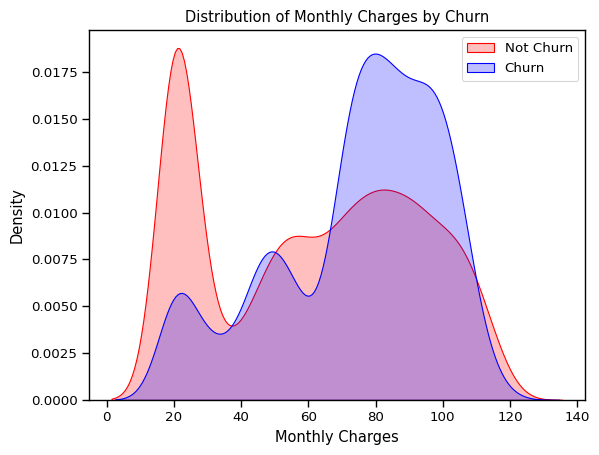

In [36]:
sns.set_context("paper", font_scale=1.1)

ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 0], color="Red", fill=True, label="Not Churn")
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 1], color="Blue", fill=True, ax=ax, label="Churn")

ax.legend(loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.show()

* **LOW MONTHLY CHARGES (AROUND $20):** This range shows a large peak for **NON-CHURNED** customers (Red) and a very low density for churned customers. This indicates that customers with the lowest monthly bills are very loyal and unlikely to leave.

* **HIGH MONTHLY CHARGES ($70 - $100):** This range shows a significant peak for **CHURNED** customers (Blue). Customers paying higher monthly fees are much more likely to churn.

* **KEY INSIGHT:** **MONTHLY CHARGE** is a critical factor in customer churn. There is a clear trend: as the monthly bill increases, the likelihood of a customer churning also increases significantly.